**Titanic - Machine Learning from Disaster**

O desafio aqui será conseguir a maior acurácia possível da quantidade de passageiros que sobreviverão ao dessastre do Titanic. Para isso estamos utilizando a base de dados **" Titanic - Machine Learning from Disaster"** retirada diretamente do kaggle em que o link é: https://www.kaggle.com/competitions/titanic/overview

# Imports

In [1]:
import numpy   as np
import pandas  as pd
import seaborn as sns

import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport

from sklearn                 import tree
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import confusion_matrix
from sklearn.ensemble        import RandomForestClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.preprocessing   import RobustScaler
from sklearn.preprocessing   import OneHotEncoder
from sklearn.preprocessing   import OrdinalEncoder
from sklearn.neural_network  import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# ETAPA 1: Primeiro Modelo

## Análise inicial da base de Treino

### Vizualização dos Dados de Treino

In [2]:
treino = pd.read_csv('train.csv')
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Analisando os dados inicialmente pelo ydata_profiling

In [3]:
profile = ProfileReport(treino, title = 'titanic_treino')
profile.to_file('titanic_treino.html')

### Analisando a base de treino

In [4]:
# Informação geral sobre cada coluna da base de dados
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# tipo de cada coluna
treino.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Valores nulos em cada coluna
treino.isnull().sum().sort_values(ascending=False).head()

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [7]:
# Tamanho da base de treino
treino.shape

(891, 12)

In [8]:
# verificando a cardinalidade das colunas
treino.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

**Colunas com alta cardionalidade como nome, número do ticket e até mesmo o código da cabine tornão o nosso modelo menos generalizado, logo vamos eliminar essas colunas mais adiante.**

## Análise inicial da base de Teste

### Vizualização da base de Teste

In [9]:
# Importando a base de teste
teste = pd.read_csv('test.csv')
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Analizando a base de Teste

In [10]:
# Informações gerais
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [11]:
# Valores nulos
teste.isnull().sum().sort_values(ascending=False).head()

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
dtype: int64

**Observamos que existe uma coluna com valores nulos na base de teste que não existe na base de treino. Logo precisaremos tratar essa coluna da base de teste.**

## Tratamento da Base de Dados

In [12]:
# Eliminando as colunas com alta cardinalidade
treino_2 = treino.drop(['Name', 'Ticket', 'Cabin'], axis=1)
teste_2 = teste.drop(['Name', 'Ticket', 'Cabin'], axis=1)

**Agora vamos tratar a coluna Age, pois não podemos deixar essa coluna com valores faltantes.
Usaremos a média das idades dos passageiros como valores substitutos**

In [13]:
# Verificando a média das idades da base de treino
treino_2.Age.mean()

29.69911764705882

In [14]:
# Substituindo os valores nulos das idades pela média na base de treino
treino_2.loc[treino_2.Age.isnull(),"Age"] = treino_2.Age.mean()

In [15]:
#Fazendo o mesmo para a base de Teste
teste_2.loc[teste_2.Age.isnull(),"Age"] = teste_2.Age.mean()

**Observamos ainda que temos na base de treino 2 valores nulos para  Embarked.**

**E também temos 1 valor nulo em Fare na base de Teste.**

**Vamos utilizar o valor da moda dessas colunas para substiruir os valores nulos em cada uma.**

In [16]:
# Verificando a coluna de Embarked
treino_2.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [17]:
# Selecionando a moda da coluna e substiruindo o valor vazio
treino_2.loc[treino_2.Embarked.isnull(),"Embarked"] = treino_2.Embarked.mode()[0]

In [18]:
# Fazendo o mesmo para a coluna Fare na base de teste
teste_2.loc[teste_2.Fare.isnull(),"Fare"] = teste_2.Fare.mode()[0]

**Verificando novamente os valores vazios** 

In [19]:
treino_2.isnull().sum().sort_values(ascending=False).head()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
dtype: int64

In [20]:
teste_2.isnull().sum().sort_values(ascending=False).head()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
dtype: int64

## Separando os valores númericos da base de dados

In [21]:
# Verificando as colunas que são númericas na base de treino
cols_treino_nr = treino_2.columns[treino_2.dtypes != 'object']
cols_treino_nr

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [22]:
# Selecionando as colunas númericas para a bas ede treino
treino_nr = treino_2.loc[:, cols_treino_nr]

In [23]:
# Repetindo o processo para a base de teste
cols_teste_nr = teste_2.columns[teste_2.dtypes != 'object']

teste_nr = teste_2.loc[:, cols_teste_nr]

## Modelo de Machine Learning

**Agora vamos separar a nossa base de treino em duas partes uma para fazer o treinamento do modelo de machine learning e outra para testar/validar esse modelo. Para isso vamos excluir da base de treino as colunas 'Survived' que é a coluna com a resposta do problema e a coluna 'PassengerId' agora pois ele vai atrapalhar no treinamento do modelo mas ele é necessário na hora da submissão  do mesmo por isso não foi excluido anteriormente.**

In [24]:
#Separando em x e y para o treino
x = treino_nr.drop(['PassengerId','Survived'],axis=1)
y = treino_2.Survived

In [25]:
# Separando em treino e validação
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=42)

### Modelo: Árvore de classificação

In [26]:
#Criando o classificador
clf_ac = tree.DecisionTreeClassifier(random_state=42)

In [27]:
# Fazendo o fit com os dados
clf_ac = clf_ac.fit(x_train,y_train)

In [28]:
# Fazendo a Previsão
y_pred_ac = clf_ac.predict(x_val)

### Modelo:KNeighborsClassifier

In [29]:
#Criando o classificador
clf_knn = KNeighborsClassifier(n_neighbors=3)

In [30]:
# Fazendo o fit com os dados
clf_knn = clf_knn.fit(x_train,y_train)

In [31]:
# Fazendo a Previsão
y_pred_knn = clf_knn.predict(x_val)

### Modelo: Regressão Logística

In [32]:
#Criando o classificador
clf_rl = LogisticRegression(random_state=42)

In [33]:
# Fazendo o fit com os dados
clf_rl = clf_rl.fit(x_train,y_train)

In [34]:
# Fazendo a Previsão
y_pred_rl = clf_rl.predict(x_val)

### Avaliação dos modelos pela acurácia

In [35]:
# Para a árvore
print(f' A acurácia para o modelo da Árvore de Classificação é: {accuracy_score(y_val,y_pred_ac): .3f}')

# Para  o KNN
print(f' A acurácia para o modelo do KNN é: {accuracy_score(y_val,y_pred_knn): .3f}')

# Para a Regressão Logística
print(f' A acurácia para o modelo da Regressão Logística é: {accuracy_score(y_val,y_pred_rl): .3f}')

 A acurácia para o modelo da Árvore de Classificação é:  0.617
 A acurácia para o modelo do KNN é:  0.654
 A acurácia para o modelo da Regressão Logística é:  0.725


**Verificamos que  para esses modelos simples temos que a Regressão Logística tem amaior acurácia.**

**Agora vamos utilizar a matriz de confusão para ver se qual modelo está errando menos**

In [36]:
# Para a arvore
confusion_matrix(y_val, y_pred_ac)

array([[125,  50],
       [ 63,  57]], dtype=int64)

In [37]:
# Para knn
confusion_matrix(y_val, y_pred_knn)

array([[133,  42],
       [ 60,  60]], dtype=int64)

In [38]:
# Para a regressão
confusion_matrix(y_val, y_pred_rl)

array([[156,  19],
       [ 62,  58]], dtype=int64)

**Verificamos também que a Regressão Logística para esse caso também erra menos. Logo vamos utilizá-lo para fazer a previsão dos dados de teste.**

In [39]:
# Vizualizando o x_train
x_train.head()

,Pclass,Age,SibSp,Parch,Fare
6,1,54.000000,0,0,51.8625
718,3,29.699118,0,0,15.5000
685,2,25.000000,1,2,41.5792
73,3,26.000000,1,0,14.4542
882,3,22.000000,0,0,10.5167


In [40]:
# Vizualizando a base de teste
teste_nr.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


**Podemos observar que a base de teste tem a coluna PassengerId a mais que a base de treino, logo vamos excluíla para as duas terem o mesmo formato**

In [41]:
# Deixando as duas bases de dados iguais
X_teste = teste_nr.drop("PassengerId", axis=1)

In [42]:
# Fazendo a previsão com o modelo
y_pred = clf_rl.predict(X_teste)

In [43]:
# Ciando o arquivo para a submissão no kaggle
submit_1 = teste_2.copy()
submit_1['Survived'] = y_pred
submit_1 = submit_1[["PassengerId",'Survived']]

In [44]:
# Vizualização do arquivo
submit_1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [172]:
# Salvando a base para a submissão
submit_1.to_csv('submit_1.csv',index=False)

**Este é o Resultado inicial da nossa análise com uma acuracia de 66,7%.**

**Agora vamos tentar melhorar esse modelo para chegar na maior acurácia possível, primeiramente tratando as colunas de texto das nossas bases de dados.**

# ETAPA 2: Tratando as Variáveis de Texto

In [45]:
# Salvando as bases de dados da etapa anterior no caso de precisarmos dela no futuro
treino_3 = treino_2.copy()
teste_3 = teste_2.copy()

## Primeiramente vamos incorporar as colunas de texto na nossa base de treino para tentar melhorar o modelo

In [46]:
# Verificando as colunas de texto na base de treino
treino_3.columns[treino_3.dtypes == 'object']

Index(['Sex', 'Embarked'], dtype='object')

In [47]:
# verificando os valores da coluna Sex
treino_3.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [48]:
# verificando os valores da coluna Embarked
treino_3.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

**Para tratar a coluna Sex, podemos criar uma nova coluna chamada "Male_Check" que vai receber 1 de o gênero do passageiro for masculino e 0 se for feminino**

In [49]:
# Usando uma Lambda funcition para fazer o tratamento
treino_3["MaleCheck"] = treino_3.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [50]:
# Verificando os valores
treino_3[['Sex', 'MaleCheck']].value_counts()

Sex     MaleCheck
male    1            577
female  0            314
Name: count, dtype: int64

**Agora precisamos fazer o mesmo tratamento para a base de teste**

In [51]:
teste_3["MaleCheck"] = teste_3.Sex.apply(lambda x: 1 if x == 'male' else 0)

teste_3[['Sex', 'MaleCheck']].value_counts()

Sex     MaleCheck
male    1            266
female  0            152
Name: count, dtype: int64

**Para tratar a coluna Embarked vamos utilizar o método OneHotEnconder que irá cria uma nova coluna para cada um dos rótulos da coluna original**

In [52]:
# Ciando o Encoder
ohe = OneHotEncoder(handle_unknown = 'ignore')

In [53]:
# Fazendo o fit com os dados
ohe = ohe.fit(treino_3[['Embarked']])

In [54]:
# Fazendo a tranformação
ohe.transform(treino_3[['Embarked']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [55]:
# Tranformando o ohe em um DataFrame
ohe_df = pd.DataFrame(ohe.transform(treino_3[['Embarked']]).toarray(), columns=ohe.get_feature_names_out())
ohe_df.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [56]:
# Agora vamos adicionar o DataFrame acima na base de treino
treino_3 = pd.concat([treino_3, ohe_df], axis=1)

In [57]:
# Verificando os valores
treino_3[['Embarked','Embarked_C','Embarked_Q','Embarked_S']].value_counts()

Embarked  Embarked_C  Embarked_Q  Embarked_S
S         0.0         0.0         1.0           646
C         1.0         0.0         0.0           168
Q         0.0         1.0         0.0            77
Name: count, dtype: int64

**Agora vamos fazer a mesma transformação para a base de teste**

In [58]:
ohe_df_teste_3 = pd.DataFrame(ohe.transform(teste_3[['Embarked']]).toarray(), columns=ohe.get_feature_names_out())

teste_3 = pd.concat([teste_3, ohe_df_teste_3], axis=1)

teste_3[['Embarked','Embarked_C','Embarked_Q','Embarked_S']].value_counts()

Embarked  Embarked_C  Embarked_Q  Embarked_S
S         0.0         0.0         1.0           270
C         1.0         0.0         0.0           102
Q         0.0         1.0         0.0            46
Name: count, dtype: int64

## Usando a nova base no nosso modelo

In [59]:
# Visualizando a base
teste_3.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,892,3,male,34.5,0,0,7.8292,Q,1,0.0,1.0,0.0
1,893,3,female,47.0,1,0,7.0000,S,0,0.0,0.0,1.0
2,894,2,male,62.0,0,0,9.6875,Q,1,0.0,1.0,0.0
3,895,3,male,27.0,0,0,8.6625,S,1,0.0,0.0,1.0
4,896,3,female,22.0,1,1,12.2875,S,0,0.0,0.0,1.0


In [60]:
# Podemos então apagar essas duas colunas que já tratamos
treino_3 = treino_3.drop(['Sex','Embarked'], axis = 1)
teste_3 = teste_3.drop(['Sex','Embarked'], axis = 1)

**Vamos utilizar somente o modelo da regressão logistica pois ele teve a maior acurácia para a nossa base de dados anteriormente**

In [61]:
#Separando em x e y para o treino
x = treino_3.drop(['PassengerId','Survived'],axis=1)
y = treino_3.Survived

### Modelos

In [62]:
# Separando em treino e validação
x_train, x_val, y_train, y_val = train_test_split(x,
                                                  y,
                                                  test_size=0.33,
                                                  random_state=42)

# árvore
clf_ac = tree.DecisionTreeClassifier(random_state=42)
clf_ac = clf_ac.fit(x_train, y_train)
y_pred_ac = clf_ac.predict(x_val)

# Knn

clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn = clf_knn.fit(x_train, y_train)
y_pred_knn = clf_knn.predict(x_val)

# regressão logística
clf_rl = LogisticRegression(random_state=42, max_iter=1000)
clf_knn = clf_rl.fit(x_train, y_train)
y_pred_rl = clf_rl.predict(x_val)

### Avaliação dos modelos pela acurácia

In [63]:
# Para a árvore
print(f' A acurácia para o modelo da Árvore de Classificação é: {accuracy_score(y_val,y_pred_ac): .3f}')

# Para  o KNN
print(f' A acurácia para o modelo do KNN é: {accuracy_score(y_val,y_pred_knn): .3f}')

# Para a Regressão Logística
print(f' A acurácia para o modelo da Regressão Logística é: {accuracy_score(y_val,y_pred_rl): .3f}')

 A acurácia para o modelo da Árvore de Classificação é:  0.749
 A acurácia para o modelo do KNN é:  0.715
 A acurácia para o modelo da Regressão Logística é:  0.817


**Agora vamos fazer a matriz de confusão para o modelo de Regressão Logística já que ele continua sendo o modelo com a maior acurácia**

In [64]:
# Matriz de confusão
confusion_matrix(y_val, y_pred_rl)

array([[153,  22],
       [ 32,  88]], dtype=int64)

## Fazendo a previsão para os dados de teste

In [65]:
# Visualizando o X_train
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
6,1,54.000000,0,0,51.8625,1,0.0,0.0,1.0
718,3,29.699118,0,0,15.5000,1,0.0,1.0,0.0
685,2,25.000000,1,2,41.5792,1,1.0,0.0,0.0
73,3,26.000000,1,0,14.4542,1,1.0,0.0,0.0
882,3,22.000000,0,0,10.5167,0,0.0,0.0,1.0


In [66]:
# Visualizando a base de teste
teste_3.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,0.0,1.0,0.0
1,893,3,47.0,1,0,7.0000,0,0.0,0.0,1.0
2,894,2,62.0,0,0,9.6875,1,0.0,1.0,0.0
3,895,3,27.0,0,0,8.6625,1,0.0,0.0,1.0
4,896,3,22.0,1,1,12.2875,0,0.0,0.0,1.0


In [67]:
# Para a base de teste ser igual a base de treino, precisamos eliminar a coluna id
x_teste = teste_3.drop(['PassengerId'], axis= 1)

In [68]:
# Utilizando a regressõ logística na base de teste
y_pred = clf_rl.predict(x_teste)

In [69]:
# Ciando uma nova coluna com a previsão na base de teste
submit_2 = teste_3.copy()
submit_2['Survived'] = y_pred
submit_2 = submit_2[["PassengerId",'Survived']]

In [70]:
# Selecionando a coluna Id e Survived
submit_2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [173]:
# Salvando a base para a submissão
submit_2.to_csv('submit_2.csv',index=False)

# ETAPA 3: Aprofundando no Negócio e Melhorando o Tratamento de Dados

In [71]:
# Salvando as bases de dados da etapa anterior no caso de precisarmos dela no futuro
treino_4 = treino_3.copy()
teste_4 = teste_3.copy()

**Nessa etapa vamos mexer modificar nossos dados de para tentarmos melhorar nossa acurácia final**

**Vamos salvar as acurácias achadas na etapa anteriaor em variáveis para podermos ter o controle da acurácia na medida que iremos avançar no código**

In [72]:
# Para árvore
as_ac = accuracy_score(y_val, y_pred_ac)

# knn
as_knn = accuracy_score(y_val, y_pred_knn)

# regressão
as_rl = accuracy_score(y_val, y_pred_rl)

**Vamos salvar esses valores em um Dataframe para visualizarmos nossa evolução**

In [73]:
as_df = pd.DataFrame({
    'modelos':  ['arvore','knn','reg_log'],
    'iniciais': [as_ac,as_knn,as_rl]
})

as_df

,modelos,iniciais
0,arvore,0.749153
1,knn,0.715254
2,reg_log,0.816949


## Analisando a escala dos dados

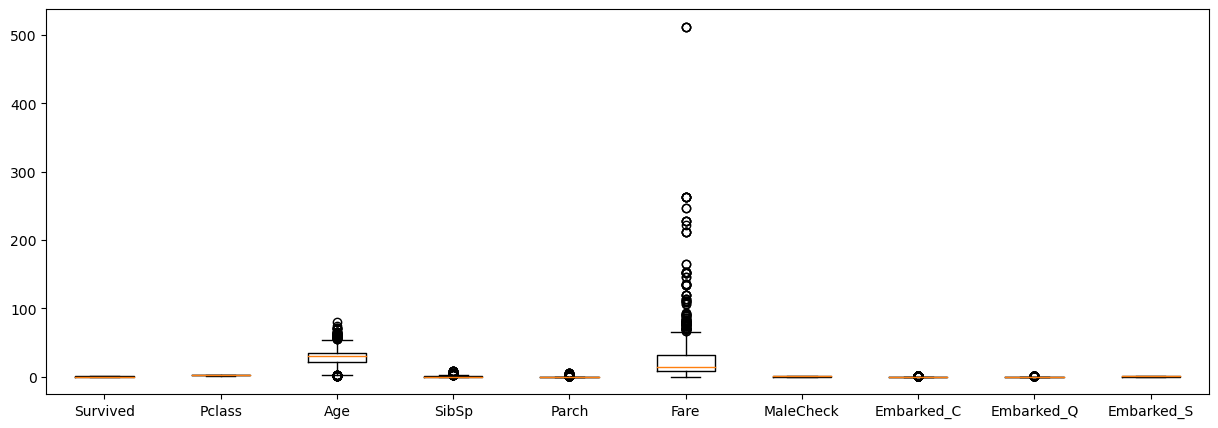

In [74]:
# Visualisando a escala desses dados
fig, ax = plt.subplots(figsize= (15,5))

ax.boxplot(treino_4.iloc[:,1:11])
ax.set_xticks(range(1,treino_4.iloc[:,1:11].shape[1]+1),treino_4.iloc[:,1:11].columns)

plt.show()

**Podemos verificar que as colunas Age e Fare estão em uma escala muito diferente das outras. Podemos começar fazendo um ajuste nessas escalas.**

**Nesse caso vamos utilizar o RobustScalaer do próprio sklearn já que essas colunas possuem outliers bem pronunciados.**

In [75]:
# Criando o scaler
transformer = RobustScaler().fit(treino_4[['Age','Fare']])

In [76]:
# Fazendo a Tranformação dos dados
treino_4[['Age','Fare']] = transformer.transform(treino_4[['Age','Fare']])

In [77]:
# Fazendo o mesmo para a base de teste
transformer = RobustScaler().fit(teste_4[['Age','Fare']])
teste_4[['Age','Fare']] = transformer.transform(teste_4[['Age','Fare']])

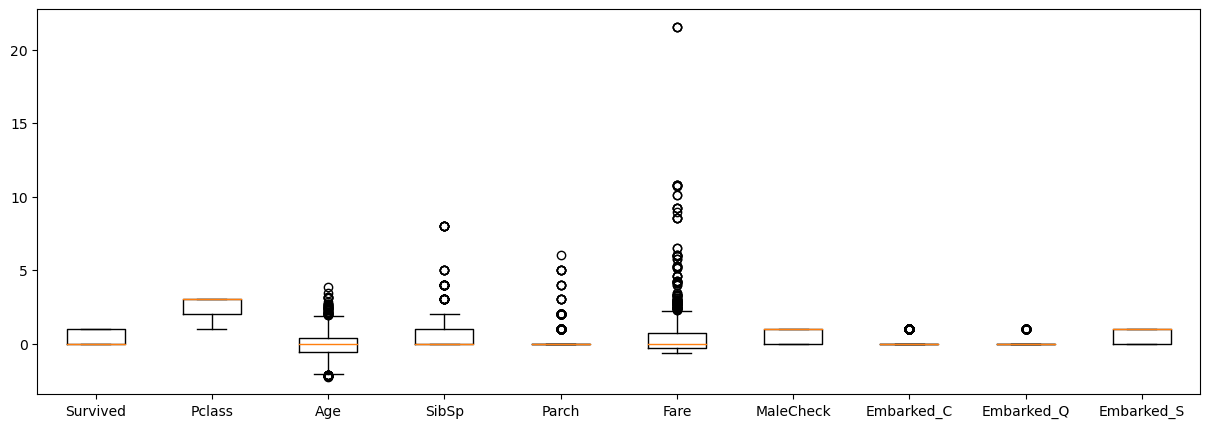

In [78]:
# Visualizando novamente os dados

# Visualisando a escala desses dados
fig, ax = plt.subplots(figsize= (15,5))

ax.boxplot(treino_4.iloc[:,1:11])
ax.set_xticks(range(1,treino_4.iloc[:,1:11].shape[1]+1),treino_4.iloc[:,1:11].columns)

plt.show()

**Verificamos que os dados já estão com uma distribuição de escala melhor. Agora vamos verificar como essa mudança altera nosso modelo**

### Fazendo a verificação da Acurácia para essa mudança de escala

In [79]:
#Separando em x e y para o treino
x = treino_4.drop(['PassengerId', 'Survived'], axis=1)
y = treino_4.Survived

# Separando em treino e validação
x_train, x_val, y_train, y_val = train_test_split(x,
                                                  y,
                                                  test_size=0.33,
                                                  random_state=42)

# árvore
clf_ac = tree.DecisionTreeClassifier(random_state=42)
clf_ac = clf_ac.fit(x_train, y_train)
y_pred_ac = clf_ac.predict(x_val)

# Knn

clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn = clf_knn.fit(x_train, y_train)
y_pred_knn = clf_knn.predict(x_val)

# regressão logística
clf_rl = LogisticRegression(random_state=42, max_iter=1000)
clf_knn = clf_rl.fit(x_train, y_train)
y_pred_rl = clf_rl.predict(x_val)

In [80]:
# Para árvore
as_ac_escala = accuracy_score(y_val, y_pred_ac)

# knn
as_knn_escala = accuracy_score(y_val, y_pred_knn)

# regressão
as_rl_escala = accuracy_score(y_val, y_pred_rl)

In [81]:
# Criando um dataframe para as novas acurácias
as_df_escala = pd.DataFrame({
    'modelos':  ['arvore','knn','reg_log'],
    'escala': [as_ac_escala,as_knn_escala,as_rl_escala]
})

as_df_escala

,modelos,escala
0,arvore,0.749153
1,knn,0.800000
2,reg_log,0.816949


In [82]:
# Juntando os datasets para comparação
as_df_final = as_df.join(as_df_escala.set_index('modelos'),on='modelos')
as_df_final

,modelos,iniciais,escala
0,arvore,0.749153,0.749153
1,knn,0.715254,0.800000
2,reg_log,0.816949,0.816949


**Podemos verificar que somente o modelo KNN teve uma melhora significativa em sua acurácia, os outros modelos não mudaram suas acurácias quando modificamos a escala dos nossos dados. Logo podemos afirmar que o KNN por ser uma medida de distância depênde fortemente  com a escala dos nossos dados diferentemente da Árvore de decissão e da Regressão Logística que não têm uma dependencia forte com a escala dos dados**

## Entendendo as colunas SibSp e Parch

**Podemos verificar que:**
- **SibSp: Número de irmãos/cônjuges a bordo do Titanic**
- **Parch: Número de pais/filhos a bordo do Titanic**

**Ou seja são o número de pessoas relacionadas a pessoa central**

**Podemos verificar quantas pessoas sobreviveram em cada um dos valores dessa coluna**

In [83]:
# Verificando a sobrevivência para SibSp
SibSp_df = treino_4.groupby('SibSp')['Survived'].agg(['sum','count','mean']).reset_index()
SibSp_df.columns = ['SibSp','sobrev','total','taxa_sobrev']
SibSp_df

,SibSp,sobrev,total,taxa_sobrev
0,0,210,608,0.345395
1,1,112,209,0.535885
2,2,13,28,0.464286
3,3,4,16,0.250000
4,4,3,18,0.166667
5,5,0,5,0.000000
6,8,0,7,0.000000


In [84]:
# Verificando a sobrevivência para Parch
Parch_df = treino_4.groupby('Parch')['Survived'].agg(['sum','count','mean']).reset_index()
Parch_df.columns = ['Parch','sobrev','total','taxa_sobrev']
Parch_df

,Parch,sobrev,total,taxa_sobrev
0,0,233,678,0.343658
1,1,65,118,0.550847
2,2,40,80,0.500000
3,3,3,5,0.600000
4,4,0,4,0.000000
5,5,1,5,0.200000
6,6,0,1,0.000000


Text(0.5, 1.0, 'sobreviventes por n° depais/filhos')

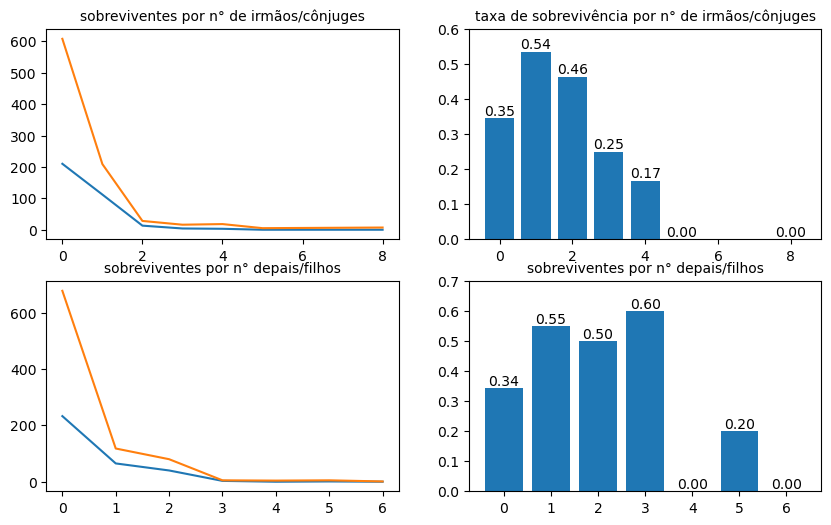

In [85]:
# Visualizando essas informações graficamente
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(10,6))

ax[0,0].plot(SibSp_df.SibSp, SibSp_df.sobrev)
ax[0,0].plot(SibSp_df.SibSp, SibSp_df.total)
ax[0,0].set_title('sobreviventes por n° de irmãos/cônjuges', fontsize=10)

labels1 = ax[0,1].bar(SibSp_df.SibSp, SibSp_df.taxa_sobrev)
ax[0,1].bar_label(labels1, fmt="%.02f")
ax[0,1].set(ylim=(0,0.6))
ax[0,1].set_title('taxa de sobrevivência por n° de irmãos/cônjuges', fontsize=10)

ax[1,0].plot(Parch_df.Parch, Parch_df.sobrev)
ax[1,0].plot(Parch_df.Parch, Parch_df.total)
ax[1,0].set_title('sobreviventes por n° depais/filhos', fontsize=10)

labels2 = ax[1,1].bar(Parch_df.Parch, Parch_df.taxa_sobrev)
ax[1,1].bar_label(labels2, fmt="%.02f")
ax[1,1].set(ylim=(0,0.7))
ax[1,1].set_title('sobreviventes por n° depais/filhos', fontsize=10)

**Podemos ver um certo padrão para o pessoas viajando junto com irmãos/cônjuges onde que pessoas viajando sozinhas têm uma menor chance de sobreviver pessoas viajando com um irmão/cônjuge têm uma maior taxa de sobrevivência e esse valor vai diminuindo a medida que a quantidade de pessoas vianjando juntas aumentam**

**Porém o único padrão que podemos observar no gráfico para filhos/pais é que pessoas vianjando sozinhas têm uma menor taxa de sobrevivência**

**Agora vamos criar uma nova coluna identificando se o passageiro está viajando sozinho ou não**

In [86]:
# Criando uma função para verificar se os dois valores são vazios
def sozinho(a,b):
    if (a ==0 and b ==0):
        return 1
    else:
        return 0

In [87]:
# Aplicando essa função na base de treino
treino_4['Sozinho'] = treino_4.apply(lambda x: sozinho(x.SibSp,x.Parch),axis=1)

In [88]:
# Verificando os valores nessa coluna
treino_4.groupby('Sozinho')[['SibSp',"Parch"]].mean()

,SibSp,Parch
Sozinho,,
0,1.316384,0.960452
1,0.000000,0.000000


In [89]:
# Fazendo o mesmo para a base de teste
teste_4['Sozinho'] = teste_4.apply(lambda x: sozinho(x.SibSp,x.Parch),axis=1)

**Podemos também criar uma nova coluna sendo o total de familiares a bordo**

In [90]:
# Criando para a base de dados
treino_4['Familiares'] = treino_4.SibSp + treino_4.Parch

In [91]:
# Agora para a base de teste
teste_4['Familiares'] = teste_4.SibSp + teste_4.Parch

In [92]:
# Verificando a sobrevivência para familiares
Familiares_df = treino_4.groupby('Familiares')['Survived'].agg(['sum','count','mean']).reset_index()
Familiares_df.columns = ['Familiares','sobrev','total','taxa_sobrev']
Familiares_df

,Familiares,sobrev,total,taxa_sobrev
0,0,163,537,0.303538
1,1,89,161,0.552795
2,2,59,102,0.578431
3,3,21,29,0.724138
4,4,3,15,0.200000
5,5,3,22,0.136364
6,6,4,12,0.333333
7,7,0,6,0.000000
8,10,0,7,0.000000


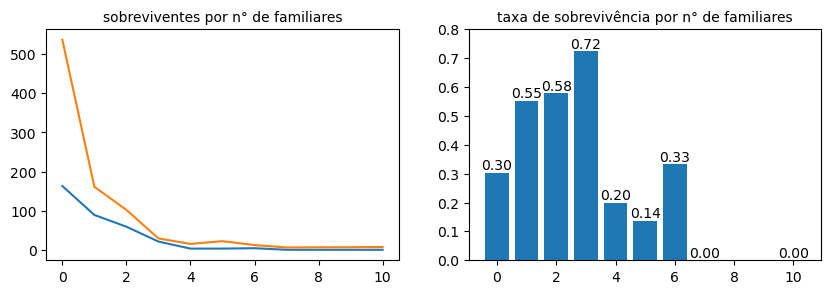

In [93]:
# Visualizando a informação de familiares
fig, ax = plt.subplots(ncols=2,figsize=(10,3))

ax[0].plot(Familiares_df.Familiares, Familiares_df.sobrev)
ax[0].plot(Familiares_df.Familiares, Familiares_df.total)
ax[0].set_title('sobreviventes por n° de familiares', fontsize=10)

labels1 = ax[1].bar(Familiares_df.Familiares, Familiares_df.taxa_sobrev)
ax[1].bar_label(labels1,fmt='%.02f')
ax[1].set(ylim=(0,0.8))
ax[1].set_title('taxa de sobrevivência por n° de familiares', fontsize=10)

plt.show()

**Podemos agora utilizar essas novas bases no nosso modelo para verificar o resultado**

### Fazendo a verificação da Acurácia para essa mudança nas colunas de familiares

In [94]:
# Verificando a base de treino
treino_4.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Sozinho,Familiares
0,1,0,3,-0.592240,1,0,-0.312011,1,0.0,0.0,1.0,0,1
1,2,1,1,0.638529,1,0,2.461242,0,1.0,0.0,0.0,0,1
2,3,1,3,-0.284548,0,0,-0.282777,0,0.0,0.0,1.0,1,0
3,4,1,1,0.407760,1,0,1.673732,0,0.0,0.0,1.0,0,1
4,5,0,3,0.407760,0,0,-0.277363,1,0.0,0.0,1.0,1,0


In [95]:
# verificando a base de teste
teste_4.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Sozinho,Familiares
0,892,3,0.331562,0,0,-0.281005,1,0.0,1.0,0.0,1,0
1,893,3,1.311954,1,0,-0.316176,0,0.0,0.0,1.0,0,1
2,894,2,2.488424,0,0,-0.202184,1,0.0,1.0,0.0,1,0
3,895,3,-0.256674,0,0,-0.245660,1,0.0,0.0,1.0,1,0
4,896,3,-0.648831,1,1,-0.091902,0,0.0,0.0,1.0,0,2


In [96]:
#Separando em x e y para o treino
x = treino_4.drop(['PassengerId', 'Survived'], axis=1)
y = treino_4.Survived

# Separando em treino e validação
x_train, x_val, y_train, y_val = train_test_split(x,
                                                  y,
                                                  test_size=0.33,
                                                  random_state=42)

# árvore
clf_ac = tree.DecisionTreeClassifier(random_state=42)
clf_ac = clf_ac.fit(x_train, y_train)
y_pred_ac = clf_ac.predict(x_val)

# Knn

clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn = clf_knn.fit(x_train, y_train)
y_pred_knn = clf_knn.predict(x_val)

# regressão logística
clf_rl = LogisticRegression(random_state=42, max_iter=1000)
clf_knn = clf_rl.fit(x_train, y_train)
y_pred_rl = clf_rl.predict(x_val)

In [97]:
# Para árvore
as_ac_familiares = accuracy_score(y_val, y_pred_ac)

# knn
as_knn_familiares = accuracy_score(y_val, y_pred_knn)

# regressão
as_rl_familiares = accuracy_score(y_val, y_pred_rl)

In [98]:
# Criando um dataframe para as novas acurácias
as_df_familiares = pd.DataFrame({
    'modelos':  ['arvore','knn','reg_log'],
    'familiares': [as_ac_familiares,as_knn_familiares,as_rl_familiares]
})

as_df_familiares

,modelos,familiares
0,arvore,0.735593
1,knn,0.786441
2,reg_log,0.806780


In [99]:
# Juntando os datasets para comparação
as_df_final = as_df_final.join(as_df_familiares.set_index('modelos'),on='modelos')
as_df_final

,modelos,iniciais,escala,familiares
0,arvore,0.749153,0.749153,0.735593
1,knn,0.715254,0.800000,0.786441
2,reg_log,0.816949,0.816949,0.806780


**Verificamos que essa informação dos familiares e cônjuges piorou um pouco nosso modelo. Isso não significa que essas colunas formam inúteis para o modelo e sim que precisamos achar uma forma de melhor utilizar essas novas colunas.**

## Selecionando as melhores variáveis para o modelo

### Verificando a correlação das variáveis

In [100]:
# Visualizando a base
treino_4.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Sozinho,Familiares
0,1,0,3,-0.592240,1,0,-0.312011,1,0.0,0.0,1.0,0,1
1,2,1,1,0.638529,1,0,2.461242,0,1.0,0.0,0.0,0,1
2,3,1,3,-0.284548,0,0,-0.282777,0,0.0,0.0,1.0,1,0
3,4,1,1,0.407760,1,0,1.673732,0,0.0,0.0,1.0,0,1
4,5,0,3,0.407760,0,0,-0.277363,1,0.0,0.0,1.0,1,0


In [101]:
# Analisando a correlação entre as variáveis
treino_4.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Sozinho,Familiares
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022204,0.057462,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.149683,-0.203367,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.074053,0.135207,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153,0.032024,-0.013855,-0.019336,0.179775,-0.248512
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.068734,-0.584471,0.890712
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.060814,-0.583398,0.783111
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.162184,-0.271832,0.217138
MaleCheck,0.042939,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.119224,0.303646,-0.200988
Embarked_C,-0.001205,0.168240,-0.243292,0.032024,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.782742,-0.095298,-0.046215
Embarked_Q,-0.033606,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.499421,0.086464,-0.058592


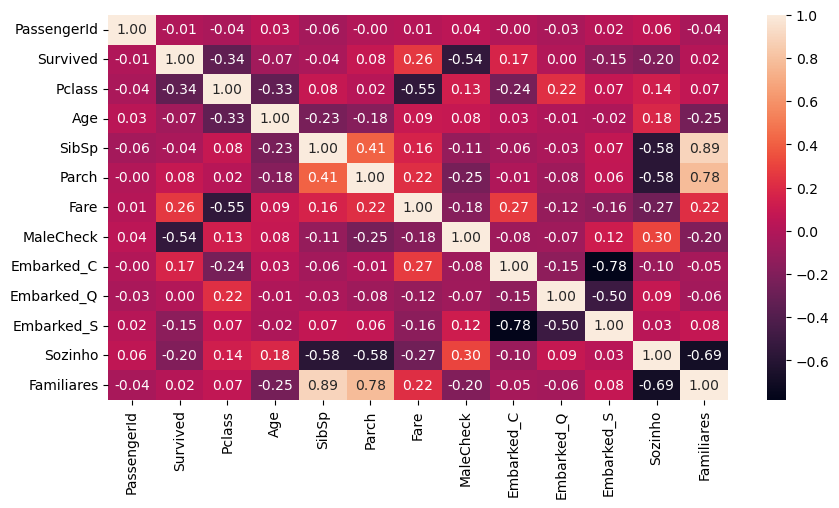

In [102]:
# Fazendo um gráfico de calor para representar as correlações

fig, ax = plt.subplots(figsize=(10,5))

sns.heatmap(treino_4.corr(), annot=True, fmt='.2f')

plt.show()

### Entendo a relação entre Pclass e Fare

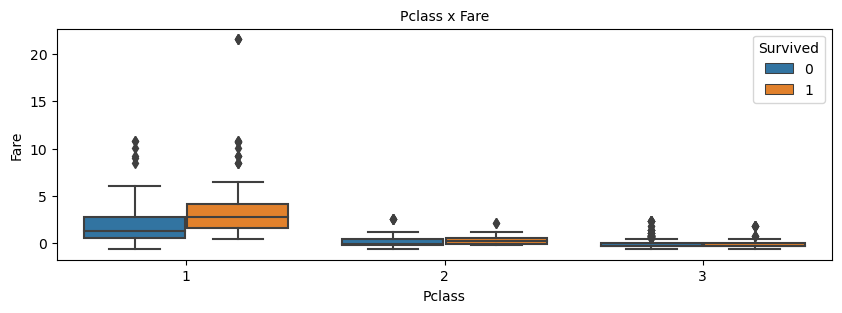

In [103]:
# visualizando a relação entre essas variáveis
fig, ax = plt.subplots(figsize=(10,3))

sns.boxplot(data=treino_4,x='Pclass',y='Fare', hue='Survived')
ax.set_title('Pclass x Fare',fontsize=10)

plt.show()

**Aparentemente as pessoas da primeira classe tiveram uma taxa de sobrevivência maior que as demais. Vamos verificar esse comportamento.**

In [104]:
# Verificando a taxa de sobrevivência em cada uma das classes
treino_4.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [105]:
# Entenendo a relação entre Pclass x Fare
treino_4.groupby(['Pclass','Survived'])['Fare'].agg(['min','mean','max'])

min      mean        max
Pclass Survived                               
1      0        -0.626005  2.175430  10.764405
       1         0.496977  3.514735  21.562738
2      0        -0.626005  0.214734   2.557247
       1        -0.171255  0.329217   2.189115
3      0        -0.626005 -0.033991   2.386174
       1        -0.626005 -0.032885   1.820802

**Podemos ver que diferentes pessoas pagaram diferentes preços pelos mesmos ingreços das mesmas classes e por exemplo na primeira classe as pessoas com os ingressos mais caros tiveram uma taxa de sobrevivência maior. Vamos tentar entender como esses ingressos de diferentes preços e se isso faz sentido.**

### Entendo as colunas de embarque

**Inicialmente pensamos não ter uma relação de ordem entre as colunas de embarque porém se você fazer uma breve pesquisa você vai descobrir que o Titanic deixou o porto de Southampton onde parou em seguida em um porto na França em que a maioria dos embarques nesses portos foram de primeira classe e por último ele parou em um porto na Irlanda em que a maioria era imigrantes de terceira classe.**

**Assim sendo podemos juntar as três colunas de embarque em apenas uma com uma hierarquia mudando assim o encoder inicialmente usado**

In [106]:
# Podemos importar novamente as bases para "recuperar" a coluna embarque. Vamos utilizar a base 2 que salvamos anteriormente
treino_2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


**Agora vamos utilizar o OrdinalEncoder para tratar a coluna de embarque**

In [107]:
# Craindo o encoder
categorias = ["S", 'C', 'Q']

enc = OrdinalEncoder(categories=[categorias],dtype='int32')

In [108]:
# Fazendo o fit com os dados
enc = enc.fit(treino_2[['Embarked']])

In [109]:
# Podemos então adicionar essa coluna na base de treino original
treino_5 = treino_4.copy()
treino_5['Embarked'] = enc.transform(treino_2[['Embarked']])

In [110]:
# Fazendo o mesmo para a base de teste
teste_5 = teste_4.copy()

enc = enc.fit(teste_2[['Embarked']])
teste_5['Embarked'] = enc.transform(teste_2[['Embarked']])

In [111]:
# Visualizando a nova base
treino_5.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Sozinho,Familiares,Embarked
0,1,0,3,-0.592240,1,0,-0.312011,1,0.0,0.0,1.0,0,1,0
1,2,1,1,0.638529,1,0,2.461242,0,1.0,0.0,0.0,0,1,1
2,3,1,3,-0.284548,0,0,-0.282777,0,0.0,0.0,1.0,1,0,0
3,4,1,1,0.407760,1,0,1.673732,0,0.0,0.0,1.0,0,1,0
4,5,0,3,0.407760,0,0,-0.277363,1,0.0,0.0,1.0,1,0,0


In [112]:
# exculuindo as colunas antigas de embarques e copiando o nova base
treino_5 = treino_5.drop(['Embarked_C','Embarked_Q','Embarked_S'],axis=1)
treino = treino_5.copy()

# exculuindo as colunas antigas de embarques e copiando o nova base
teste_5 = teste_5.drop(['Embarked_C','Embarked_Q','Embarked_S'],axis=1)
teste = teste_5.copy()

treino.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,1,0,3,-0.592240,1,0,-0.312011,1,0,1,0
1,2,1,1,0.638529,1,0,2.461242,0,0,1,1
2,3,1,3,-0.284548,0,0,-0.282777,0,1,0,0
3,4,1,1,0.407760,1,0,1.673732,0,0,1,0
4,5,0,3,0.407760,0,0,-0.277363,1,1,0,0


<Axes: >

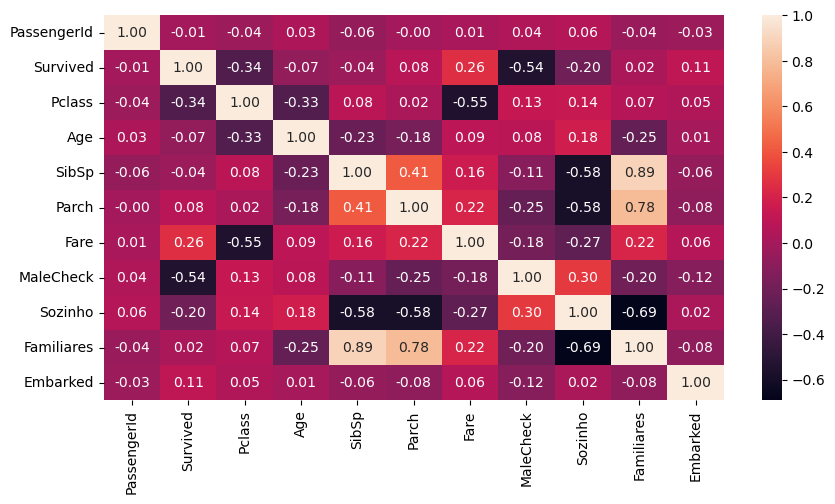

In [113]:
# Visualizando novamente a correlação
fig, ax =plt.subplots(figsize=(10,5))

sns.heatmap(treino_5.corr(),annot=True, fmt='.2f')

### Entendo as colunas de familia

**Vamos utilizar a regressão logística e a árvore de classificação para verificar a importância de cada coluna**

In [114]:
# Separando x e y
x = treino_5.drop(['PassengerId','Survived'],axis=1)
y = treino_5.Survived

In [115]:
# Usando a regressão logística nos dados
clf_rl = LogisticRegression(random_state=42, max_iter=1000).fit(x,y)

In [116]:
# Verificando a importância
clf_rl.coef_[0]

array([-1.03314773, -0.49645712, -0.26819737,  0.01690958,  0.04398615,
       -2.5345877 , -0.73233826, -0.25128778,  0.23866778])

In [117]:
# Agora usando a árvore de classificação
clf_ac = tree.DecisionTreeClassifier(random_state=42).fit(x,y)

In [118]:
# Verificando a importância
clf_ac.feature_importances_

array([0.10901775, 0.22826711, 0.01907221, 0.0272942 , 0.23870173,
       0.30933519, 0.00397775, 0.04365035, 0.02068372])

In [119]:
# Criando um Dataframe
importancia = pd.DataFrame({
    'colunas': x.columns,
    'reg_log': clf_rl.coef_[0],
    'arvore': clf_ac.feature_importances_
    
})

importancia

,colunas,reg_log,arvore
0,Pclass,-1.033148,0.109018
1,Age,-0.496457,0.228267
2,SibSp,-0.268197,0.019072
3,Parch,0.016910,0.027294
4,Fare,0.043986,0.238702
5,MaleCheck,-2.534588,0.309335
6,Sozinho,-0.732338,0.003978
7,Familiares,-0.251288,0.043650
8,Embarked,0.238668,0.020684


**Podemos observar que a coluna Sozinho tem um alto valor para a regressão logística e apesar da coluna Familiares ter um valor baixo e um pouco menor que a SibSp ela engloba tanto essa coluna como a Parch e ela é bem mais importante (tem um valor maior) para a árvore de decisão. Logo vamos manter somente as colunas Sozinho e Familiares excluindo assim as colunas SibSp e Parch das nossas bases de Treino e de Teste.**

In [120]:
# Podemos apenas manter as colunas mais relevantes
treino_6 = treino_5.drop(['SibSp','Parch'],axis=1)
teste_6 = teste_5.drop(['SibSp','Parch'],axis=1)

### Usando essa nova base no modelo

In [121]:
treino_6.head()

,PassengerId,Survived,Pclass,Age,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,1,0,3,-0.592240,-0.312011,1,0,1,0
1,2,1,1,0.638529,2.461242,0,0,1,1
2,3,1,3,-0.284548,-0.282777,0,1,0,0
3,4,1,1,0.407760,1.673732,0,0,1,0
4,5,0,3,0.407760,-0.277363,1,1,0,0


In [122]:
6#Separando em x e y para o treino
x = treino_6.drop(['PassengerId', 'Survived'], axis=1)
y = treino_6.Survived

# Separando em treino e validação
x_train, x_val, y_train, y_val = train_test_split(x,
                                                  y,
                                                  test_size=0.33,
                                                  random_state=42)

# árvore
clf_ac = tree.DecisionTreeClassifier(random_state=42)
clf_ac = clf_ac.fit(x_train, y_train)
y_pred_ac = clf_ac.predict(x_val)

# Knn

clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn = clf_knn.fit(x_train, y_train)
y_pred_knn = clf_knn.predict(x_val)

# regressão logística
clf_rl = LogisticRegression(random_state=42, max_iter=1000)
clf_rl = clf_rl.fit(x_train, y_train)
y_pred_rl = clf_rl.predict(x_val)

In [123]:
# Para árvore
as_ac_colunas = accuracy_score(y_val, y_pred_ac)

# knn
as_knn_colunas = accuracy_score(y_val, y_pred_knn)

# regressão
as_rl_colunas = accuracy_score(y_val, y_pred_rl)

In [124]:
# Criando um dataframe para as novas acurácias
as_df_colunas = pd.DataFrame({
    'modelos':  ['arvore','knn','reg_log'],
    'colunas': [as_ac_colunas,as_knn_colunas,as_rl_colunas]
})

as_df_colunas

,modelos,colunas
0,arvore,0.762712
1,knn,0.786441
2,reg_log,0.810169


In [125]:
# Juntando os datasets para comparação
as_df_final = as_df_final.join(as_df_colunas.set_index('modelos'),on='modelos')
as_df_final

,modelos,iniciais,escala,familiares,colunas
0,arvore,0.749153,0.749153,0.735593,0.762712
1,knn,0.715254,0.800000,0.786441,0.786441
2,reg_log,0.816949,0.816949,0.806780,0.810169


## Fazendo a previsão para os dados de teste

In [126]:
# Visualizando o x_train
x_train.head()

,Pclass,Age,Fare,MaleCheck,Sozinho,Familiares,Embarked
6,1,1.869299,1.620136,1,1,0,0
718,3,0.000000,0.045293,1,1,0,2
685,2,-0.361471,1.174771,1,0,3,1
73,3,-0.284548,0.000000,1,0,1,1
882,3,-0.592240,-0.170531,0,1,0,0


In [127]:
# Visualizando a base de teste
teste_6.head()

,PassengerId,Pclass,Age,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,892,3,0.331562,-0.281005,1,1,0,2
1,893,3,1.311954,-0.316176,0,0,1,0
2,894,2,2.488424,-0.202184,1,1,0,2
3,895,3,-0.256674,-0.245660,1,1,0,0
4,896,3,-0.648831,-0.091902,0,0,2,0


In [128]:
# Para a base de teste ser igual a base de treino, precisamos eliminar a coluna id
x_teste = teste_6.drop(['PassengerId'], axis= 1)

In [129]:
# Utilizando a regressõ logística na base de teste
y_pred = clf_rl.predict(x_teste)

In [130]:
# Ciando uma nova coluna com a previsão na base de teste
submit_3 = teste_6.copy()
submit_3['Survived'] = y_pred
submit_3 = submit_3[["PassengerId",'Survived']]

In [131]:
submit_3

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [174]:
# Salvando a base para a submissão
submit_3.to_csv('submit_3.csv',index=False)

# ETAPA 4: Selecionando Novos Modelos Para Novas Previsões

- **Iremos manter dos 3 modelos anteriores apenas o que teve a maior acurácia dentre os 3 que é o modelo de Regressão Logística**
- **Os outros modelos que iremos utilizar a partir dessa estapa serão o Random Forest e o MLPClassifier (um modelo de redes neurais). Sendo ambos ainda do sklearn.**

In [132]:
# Modificando a ordem das colunas para uma acuracia maior
cols_new = ['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'MaleCheck',
 'Sozinho',
 'Familiares']
treino_7 = treino_5[cols_new]
treino_7.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Sozinho,Familiares
0,1,0,3,-0.592240,1,0,-0.312011,0,1,0,1
1,2,1,1,0.638529,1,0,2.461242,1,0,0,1
2,3,1,3,-0.284548,0,0,-0.282777,0,0,1,0
3,4,1,1,0.407760,1,0,1.673732,0,0,0,1
4,5,0,3,0.407760,0,0,-0.277363,0,1,1,0


In [133]:
# Fazendo o mesmo para a base de teste
cols_new = ['PassengerId',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'MaleCheck',
 'Sozinho',
 'Familiares']
teste_7 = teste_5[cols_new]
teste_7.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Sozinho,Familiares
0,892,3,0.331562,0,0,-0.281005,2,1,1,0
1,893,3,1.311954,1,0,-0.316176,0,0,0,1
2,894,2,2.488424,0,0,-0.202184,2,1,1,0
3,895,3,-0.256674,0,0,-0.245660,0,1,1,0
4,896,3,-0.648831,1,1,-0.091902,0,0,0,2


In [134]:
#Separando em x e y para o treino
x = treino_7.drop(['PassengerId', 'Survived'], axis=1)
y = treino_7.Survived

# Separando em treino e validação
x_train, x_val, y_train, y_val = train_test_split(x,
                                                  y,
                                                  test_size=0.33,
                                                  random_state=42)



# regressão logística
clf_rl = LogisticRegression(random_state=42, max_iter=1000)
clf_rl = clf_rl.fit(x_train, y_train)
y_pred_rl = clf_rl.predict(x_val)

# Random Forest
clf_rf = RandomForestClassifier(random_state=42)
clf_rf = clf_rf.fit(x_train, y_train)
y_pred_rf = clf_rf.predict(x_val)

# MLPClassifier (Rede Neurais)
clf_mlp = MLPClassifier(random_state=42, max_iter=5000)
clf_mlp = clf_mlp.fit(x_train, y_train)
y_pred_mlp = clf_mlp.predict(x_val)

In [135]:
# Para a Regressão Logística
print(f' A acurácia para o modelo da Regressão Logística é: {accuracy_score(y_val,y_pred_rl): .4f}')

# Para  o Random Forest
print(f' A acurácia para o modelo do Random Forest é: {accuracy_score(y_val,y_pred_rf): .4f}')

# Para a MLP (Redes Neurais)
print(f' A acurácia para o modelo do MLPClassifier (Redes Neurais) é: {accuracy_score(y_val,y_pred_mlp): .4f}')

 A acurácia para o modelo da Regressão Logística é:  0.8068
 A acurácia para o modelo do Random Forest é:  0.7898
 A acurácia para o modelo do MLPClassifier (Redes Neurais) é:  0.8305


**Verificando a matriz de confusão**

In [136]:
# Para a regressão
confusion_matrix(y_val, y_pred_rl)

array([[152,  23],
       [ 34,  86]], dtype=int64)

In [137]:
# Para a Random Forest
confusion_matrix(y_val, y_pred_rf)

array([[148,  27],
       [ 35,  85]], dtype=int64)

In [138]:
# Para MLPClassifier
confusion_matrix(y_val, y_pred_mlp)

array([[160,  15],
       [ 35,  85]], dtype=int64)

Chegamos ao Resultado que o modelo MLP (Redes Neurais) realmente é o melhor modelo para os nossos dados

### Fazendo a previsão para os dados de teste

In [139]:
# Visualizando a base de teste
teste_7.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Sozinho,Familiares
0,892,3,0.331562,0,0,-0.281005,2,1,1,0
1,893,3,1.311954,1,0,-0.316176,0,0,0,1
2,894,2,2.488424,0,0,-0.202184,2,1,1,0
3,895,3,-0.256674,0,0,-0.245660,0,1,1,0
4,896,3,-0.648831,1,1,-0.091902,0,0,0,2


In [140]:
# Para a base de teste ser igual a base de treino, precisamos eliminar a coluna de id
x_teste = teste_7.drop('PassengerId',axis=1)

In [141]:
# Utilizando o melhor modelo na base de teste
y_pred = clf_mlp.predict(x_teste)

In [142]:
# Ciando uma nova coluna com a previsão na base de teste
submit_4 = teste_7.copy()
submit_4['Survived'] = y_pred
submit_4 = submit_4[["PassengerId",'Survived']]

In [143]:
submit_4

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [144]:
# Salvando a base para a submissão
submit_4.to_csv('submit_4.csv',index=False)

Chegamos que o Resultado Final para esse envio foi de 0.74880. Ou seja nosso modelo piorou desde o ultimo envio e provavelmente nosso modelo está sofrendo um overfitting, logo nosso modelo está funcionando melhor nos dados de treino porém nos dados de teste ele é pior. Vamos tentar nos livrar desse problema abaixo.

#  ETAPA 5: Utilizando o GridSearchCV para Melhorar os Parâmetros e Previsão Final

Nessa parte final vamos utilizar tanto o Grid Search tanto o Kfold para procurar de forma automática quais são os melhores parametros de cada modelo que estamos utilizando.

In [145]:
# Garantindo nossas bases
treino_8 = treino_7.copy()
teste_8 = teste_7.copy()

In [146]:
# Visualizando a base de treino
treino_8.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Sozinho,Familiares
0,1,0,3,-0.592240,1,0,-0.312011,0,1,0,1
1,2,1,1,0.638529,1,0,2.461242,1,0,0,1
2,3,1,3,-0.284548,0,0,-0.282777,0,0,1,0
3,4,1,1,0.407760,1,0,1.673732,0,0,0,1
4,5,0,3,0.407760,0,0,-0.277363,0,1,1,0


In [147]:
# E a base de teste
teste_8.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Sozinho,Familiares
0,892,3,0.331562,0,0,-0.281005,2,1,1,0
1,893,3,1.311954,1,0,-0.316176,0,0,0,1
2,894,2,2.488424,0,0,-0.202184,2,1,1,0
3,895,3,-0.256674,0,0,-0.245660,0,1,1,0
4,896,3,-0.648831,1,1,-0.091902,0,0,0,2


Vamos fazer exatamente a mesma medida anterior, porém vamos diminuir o tamanho da nossa base de teste para 20% do total.
Também vamos definir parametros especificos que vão melhorar a acurácia do nosso modelo.

In [148]:
#Separando em x e y para o treino
x = treino_7.drop(['PassengerId', 'Survived'], axis=1)
y = treino_7.Survived

# Separando em treino e validação
x_train, x_val, y_train, y_val = train_test_split(x,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)



# regressão logística
clf_rl = LogisticRegression(random_state=42)


# Random Forest
clf_rf = RandomForestClassifier(random_state=42)

# MLPClassifier (Rede Neurais)
clf_mlp = MLPClassifier(random_state=42)


In [149]:
# Parametros para a regressão logistica
parametros_rl = {
    'penalty' : ['l1','l2'],
    'C'       : [0.01,0.1,1,10],
    'solver'  : ['lbfgs','liblinear','saga'],
    'max_iter': [100,1000,5000,10000]
}

In [150]:
# Parametros para a random forest
parametros_rf = {
    'n_estimators': [100,200,500,1000],
    'criterion'   : ['gini','entropy','log_loss'],
    'max_depth'   : [2,4,6,8,None],
    'max_features': ['sqrt','log2',None]
}

In [151]:
# Parametros para o MLP
parametros_mlp = {
    'solver'  : ['lbfgs','sgd','adam'],
    'alpha'   : [10.0**(-1),10.0**(-5),10.0**(-7),10.0**(-10)],
    'max_iter': [200,500,1000,5000]
}

## Calculando os melhores parametros para cada modelo (DEMORA)

In [152]:
# Para a regressão logística
kfold_rl = KFold(shuffle=True,random_state=42,n_splits=8)
grid_search_rl = GridSearchCV(clf_rl,parametros_rl,scoring='accuracy',cv=kfold_rl)
grid_search_rl = grid_search_rl.fit(x_train,y_train)

In [153]:
# Para a random forest
kfold_rf = KFold(shuffle=True,random_state=42,n_splits=8)
grid_search_rf = GridSearchCV(clf_rf,parametros_rf,scoring='accuracy',cv=kfold_rf)
grid_search_rf = grid_search_rf.fit(x_train,y_train)

In [154]:
# Para o MLP
kfold_mlp = KFold(shuffle=True,random_state=42,n_splits=8)
grid_search_mlp = GridSearchCV(clf_mlp,parametros_mlp,scoring='accuracy',cv=kfold_mlp)
grid_search_mlp = grid_search_mlp.fit(x_train,y_train)

## Verificando os melhores parametros

In [155]:
# Verificando os melhores parametros da regressão logística
grid_search_rl.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [156]:
# Para o random forest
grid_search_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [157]:
# Para o MLP
grid_search_mlp.best_params_

{'alpha': 0.1, 'max_iter': 200, 'solver': 'adam'}

## Melhores Scores

In [158]:
# Verificando o melhor score da regressão logística
grid_search_rl.best_score_

0.8089887640449438

In [159]:
# Para a random forest
grid_search_rf.best_score_

0.8314606741573034

In [160]:
# Para o MLP
grid_search_mlp.best_score_

0.8174157303370786

## Previssão com os melhores classificadores

In [161]:
# Para a regressão Logística
clf_best_rl = grid_search_rl.best_estimator_
y_pred_rl = clf_best_rl.predict(x_val)

In [162]:
# Para o Random Forest
clf_best_rf = grid_search_rf.best_estimator_
y_pred_rf = clf_best_rf.predict(x_val)

In [163]:
# Para o MLP
clf_best_mlp = grid_search_mlp.best_estimator_
y_pred_mlp = clf_best_mlp.predict(x_val)

In [164]:
# Para a Regressão Logística
print(f' A acurácia para o modelo da Regressão Logística é: {accuracy_score(y_val,y_pred_rl): .4f}')

# Para  o Random Forest
print(f' A acurácia para o modelo do Random Forest é: {accuracy_score(y_val,y_pred_rf): .4f}')

# Para a MLP (Redes Neurais)
print(f' A acurácia para o modelo do MLPClassifier (Redes Neurais) é: {accuracy_score(y_val,y_pred_mlp): .4f}')

 A acurácia para o modelo da Regressão Logística é:  0.8045
 A acurácia para o modelo do Random Forest é:  0.8101
 A acurácia para o modelo do MLPClassifier (Redes Neurais) é:  0.8101


Verificamos que tanto o Random Forest quanto o MLPClassifier deram o mesmo resultado para a acurácia nos dados de validação, porém como o modelo do Random Forest teve foi um pouco melhor nos dados de treino vamos utiliza-lo nessa última verificação com os dados de teste.

## Fazendo a previsão para os dados de teste

In [165]:
# Visualizando o x_train
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Sozinho,Familiares
331,1,1.215452,0,0,0.608317,0,1,1,0
733,2,-0.515317,0,0,-0.062981,0,1,1,0
382,3,0.176991,0,0,-0.282777,0,1,1,0
704,3,-0.284548,1,0,-0.285843,0,1,0,1
813,3,-1.823009,4,2,0.728501,0,0,0,6


In [166]:
# Visualizando os dados de treinos
treino_8.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Sozinho,Familiares
0,1,0,3,-0.592240,1,0,-0.312011,0,1,0,1
1,2,1,1,0.638529,1,0,2.461242,1,0,0,1
2,3,1,3,-0.284548,0,0,-0.282777,0,0,1,0
3,4,1,1,0.407760,1,0,1.673732,0,0,0,1
4,5,0,3,0.407760,0,0,-0.277363,0,1,1,0


In [167]:
# Para a base de teste ser igual a base de treino, precisamos eliminar a coluna de id
x_teste = teste_8.drop('PassengerId',axis=1)

In [168]:
# Utilizando o melhor modelo na base de teste
y_pred = clf_best_rf.predict(x_teste)

In [169]:
# Ciando uma nova coluna com a previsão na base de teste
submit_5 = teste_8.copy()
submit_5['Survived'] = y_pred
submit_5 = submit_5[["PassengerId",'Survived']]

In [170]:
submit_5

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [171]:
# Salvando a base para a submissão
submit_5.to_csv('submit_5.csv',index=False)

Para Essa última parte obtivemos uma acurácia de 0,77990 no envio do kaggle sendo nossa melhor acurácia até o momento.

# Gráfico com o Resumo dos Resultados da Acurácia

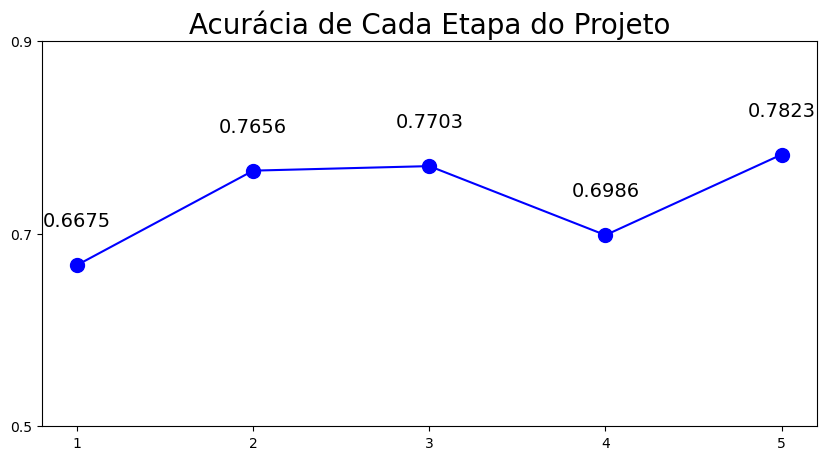

In [49]:
x = [1,2,3,4,5]
y = [0.6675,0.7656,0.7703,0.6986,0.7823]

fig, ax = plt.subplots(figsize= (10,5))

ax.set_xticks([1,2,3,4,5])
ax.set_yticks([0.5,0.70,0.9])
ax.set_title('Acurácia de Cada Etapa do Projeto', fontsize=20)

plt.plot(x,y,'-bo',markersize=10)
plt.ylim(0.5,0.9)


for l in range(0,5):
    
    plt.annotate(y[l],(x[l],y[l]), xytext=(x[l],y[l]+0.04),ha='center',fontsize=14)